# **Exercícios Estatística**
Utilizando os conhecimentos adquiridos no treinamento, realize uma análise descritiva básica com dados da Pesquisa Nacional por Amostra de Domicílios (PNAD) de 2015, diferente da utilizada anteriormente.

O objetivo é construir histogramas, calcular e interpretar medidas de tendência central, medidas separatrizes e medidas de dispersão.

Siga o roteiro proposto, complete as células e explore possíveis insights adicionais a partir do conjunto de dados.



## **DATASET DO PROJETO**

Pesquisa Nacional por Amostra de Domicílios - 2015

A Pesquisa Nacional por Amostra de Domicílios - PNAD investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas**

Sugestões: pandas, numpy, seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importe o dataset e armazene o conteúdo em uma DataFrame**

In [ ]:
dadosPNAD = pd.read_csv('/content/drive/MyDrive/dadosPNAD.csv')

## **Visualize o conteúdo do DataFrame**

In [ ]:
dadosPNAD

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


## **Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)**

Descreva os pontos mais relevantes que você observa na tabela e no gráfico.
Classes de renda:

A ► Acima de 25 SM

B ► De 15 a 25 SM

C ► De 5 a 15 SM

D ► De 2 a 5 SM

E ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de R$ 788,00.

Siga os passos abaixo:



## **1º Definir os intevalos das classes em reais (R$)**

In [ ]:
min = dadosPNAD.Renda.min()
max = dadosPNAD.Renda.max()
classes = [min, 2*788, 5*788, 15*788, 25*788, max]
print(classes)

[0, 1576, 3940, 11820, 19700, 200000]


## **2º Definir os labels das classes**

In [ ]:
labels = ['E', 'D', 'C', 'B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

## **3º Construir a coluna de frequências**

In [ ]:
frequencia = pd.value_counts(pd.cut(x = dadosPNAD.Renda, bins = classes,
                      labels = labels, include_lowest = True))
frequencia

<ipython-input-7-24a752bd44ad>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(pd.cut(x = dadosPNAD.Renda, bins = classes,


,count
Renda,
E,49755
D,18602
C,7241
B,822
A,420


## **4º Construir a coluna de percentuais**

In [ ]:
percentual = pd.cut(x = dadosPNAD.Renda, bins = classes,
                              labels= labels,
                              include_lowest = True).value_counts(normalize = True).round(2)*100
percentual

,proportion
Renda,
E,65.0
D,24.0
C,9.0
B,1.0
A,1.0


## **5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes**

In [ ]:
tabela = pd.DataFrame(data = {'frequencia': frequencia,
                              'percentual': percentual})
tabela.rename_axis('classes', axis = 1, inplace= True)
tabela.sort_index(ascending = False, inplace = True)
tabela

classes,frequencia,percentual
Renda,,
A,420,1.0
B,822,1.0
C,7241,9.0
D,18602,24.0
E,49755,65.0


## **Construa um gráfico de barras para visualizar as informações da tabela de frequências acima**

<ipython-input-10-6fd65efbec7e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graficoClasses = sns.barplot(data=tabela, x=tabela.index, y='frequencia', palette='muted')


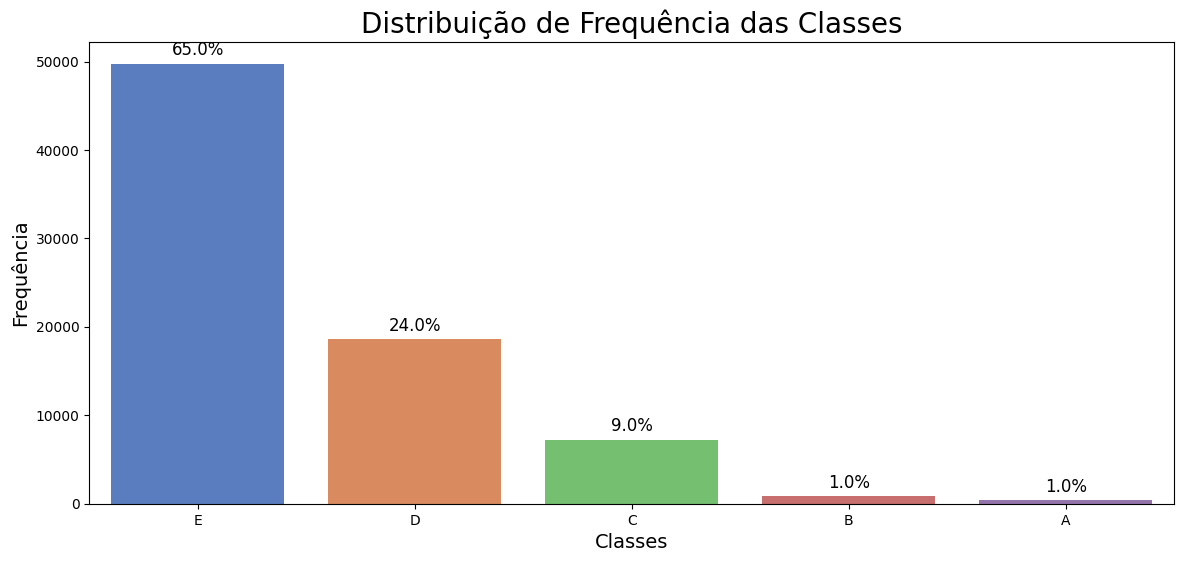

In [ ]:
max_renda = dadosPNAD.Renda.max()

graficoClasses = sns.barplot(data=tabela, x=tabela.index, y='frequencia', palette='muted')
graficoClasses.figure.set_size_inches(14, 6)
graficoClasses.set_xlabel('Classes', fontsize=14)
graficoClasses.set_ylabel('Frequência', fontsize=14)
graficoClasses.set_title('Distribuição de Frequência das Classes', fontsize=20)

for bar, percentual in zip(graficoClasses.patches, tabela['percentual'][::-1]):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.text(x, y + tabela['frequencia'].max() * 0.01, f'{percentual:.1f}%',
             ha='center', va='bottom', fontsize=12, color='black')

plt.show()

# **Conclusões**

Ao analisar a distribuição da renda no país, fica evidente o quanto a desigualdade social é significativa. A maior parte da população concentra-se nas classes de menor renda, especialmente na classe E, que representa os que têm as condições econômicas mais vulneráveis. No entanto, apenas uma pequena parcela da população está inserida nas classes A e B, que possuem maior poder aquisitivo e acesso a mais oportunidades.

## **Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset**

Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)

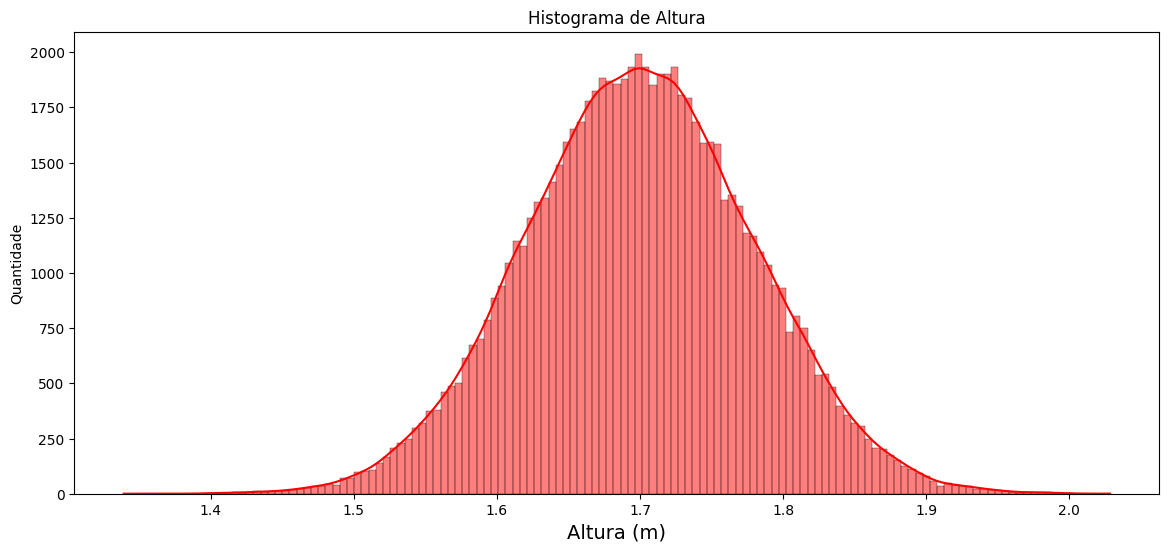

In [ ]:
graficoAltura = sns.histplot(dadosPNAD.Altura, color = 'r', kde = True)
graficoAltura.figure.set_size_inches(14, 6)
graficoAltura.set_xlabel('Altura (m)', fontsize = 14 )
graficoAltura.set_ylabel('Quantidade')
graficoAltura.set_title('Histograma de Altura');

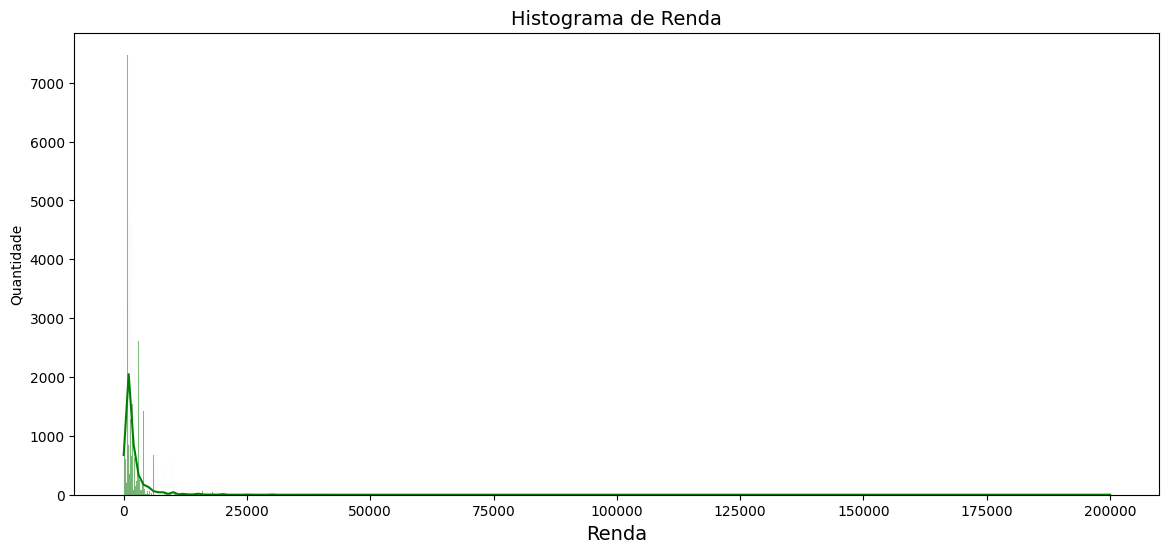

In [ ]:
graficoRenda = sns.histplot(dadosPNAD.Renda, kde = True, color = 'g')
graficoRenda.figure.set_size_inches(14, 6)
graficoRenda.set_xlabel('Renda', fontsize = 14 )
graficoRenda.set_ylabel('Quantidade')
graficoRenda.set_title('Histograma de Renda', fontsize =14);

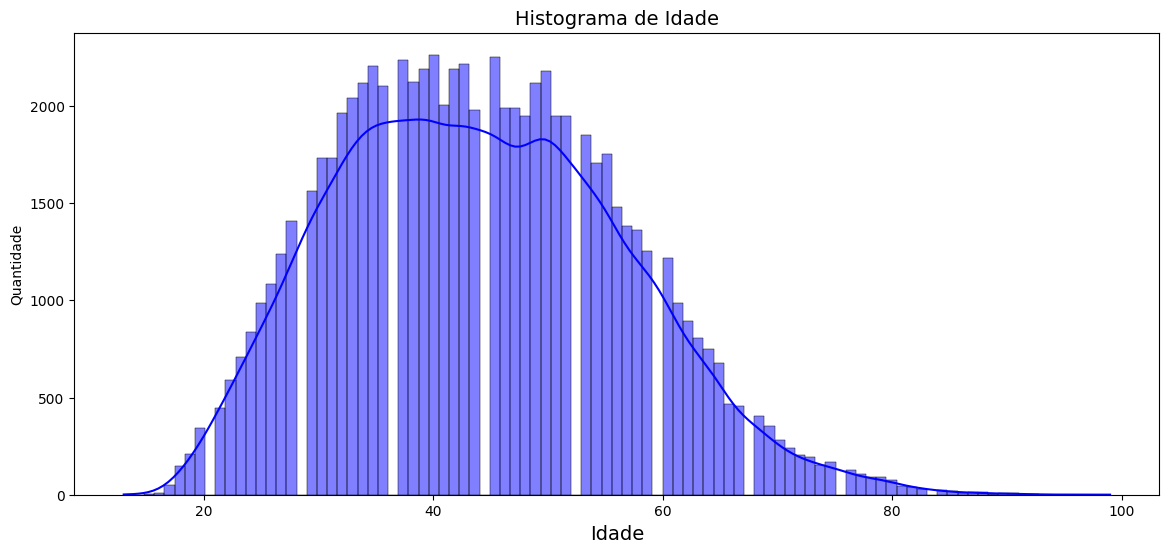

In [ ]:
graficoIdade = sns.histplot(dadosPNAD.Idade, color = 'b', kde = True)
graficoIdade.figure.set_size_inches(14, 6)
graficoIdade.set_xlabel('Idade', fontsize = 14 )
graficoIdade.set_ylabel('Quantidade')
graficoIdade.set_title('Histograma de Idade', fontsize = 14);

# **Conclusões**

O primeiro histograma, que representa a variável Altura, apresenta uma distribuição simétrica, o que indica que os dados estão bem equilibrados em torno da média.

Por outro lado, as variáveis Renda e Idade apresentam distribuições assimétricas à direita:

No caso da Renda, essa assimetria é explicada pelo fato de que a maior parte das pessoas recebe salários muito próximos ao valor do salário mínimo ou apenas um pouco acima dele. Além de apenas uma pequena parte da população possui rendimentos significativamente mais altos, o que faz com que esses valores extremos distorçam a distribuição e a puxem para a direita. Isso também dificulta a visualização e interpretação do histograma, já que a presença de poucos valores muito altos pode dar uma falsa impressão da realidade da maioria.

A variável Idade também apresenta uma leve assimetria à direita. Isso acontece porque, embora a maior parte dos chefes de família tenha idades concentradas em faixas mais comuns, há casos de pessoas com idades bastante elevadas. Esses poucos valores mais extremos aumentam a dispersão dos dados e contribuem para a cauda direita da distribuição.



## **Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00**

Text(0, 0.5, 'Quantidade')

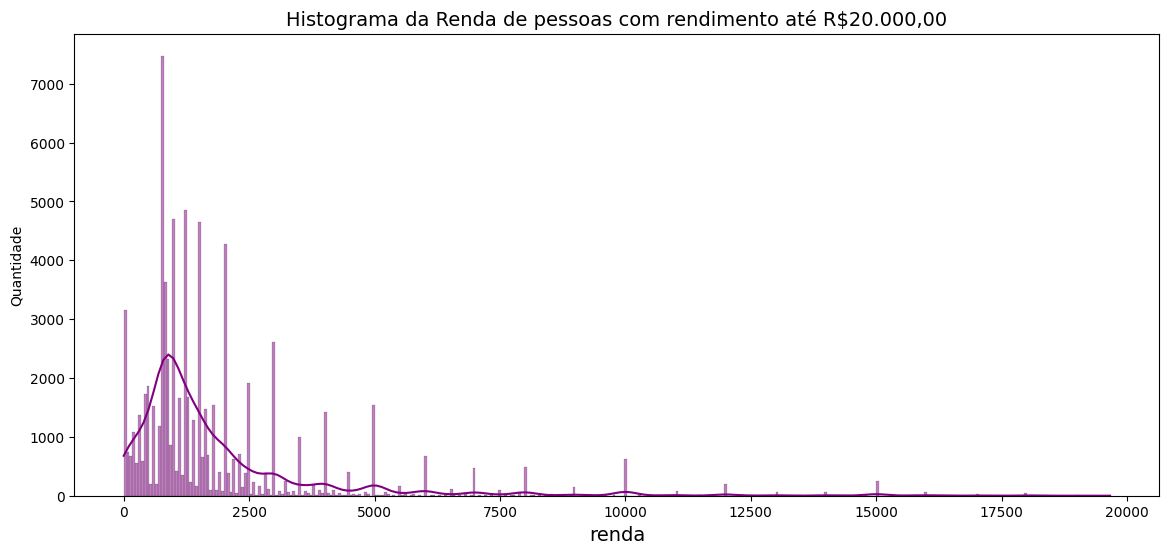

In [ ]:
renda_20000 = dadosPNAD.Renda[dadosPNAD.Renda < 20000]
gráficoRendaAlta = sns.histplot(renda_20000, color = 'purple', kde = True)
gráficoRendaAlta.figure.set_size_inches(14,6)
gráficoRendaAlta.set_title('Histograma da Renda de pessoas com rendimento até R$20.000,00', fontsize =14)
gráficoRendaAlta.set_xlabel('renda', fontsize = 14);
gráficoRendaAlta.set_ylabel('Quantidade')

## **Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR**

Avalie o resultado da tabela e escreva suas principais conclusões

Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto

In [ ]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [ ]:
tabelaSexoCor = pd.crosstab(dadosPNAD.Cor, dadosPNAD.Sexo)
tabelaSexoCor.rename(index = cor, columns= sexo, inplace = True)
tabelaSexoCor

Sexo,Masculino,Feminino
Cor,,
Indígena,256,101
Branca,22194,9621
Preta,5502,2889
Amarela,235,117
Parda,25063,10862


In [ ]:
tabelaSexoCor = pd.crosstab(dadosPNAD.Cor, dadosPNAD.Sexo, normalize = True).round(4)*100
tabelaSexoCor.rename(index = cor, columns = sexo, inplace = True)
tabelaSexoCor

Sexo,Masculino,Feminino
Cor,,
Indígena,0.33,0.13
Branca,28.88,12.52
Preta,7.16,3.76
Amarela,0.31,0.15
Parda,32.62,14.14


# **Conclusões**

Como a análise considerou apenas os registros das Pessoas de Referência de cada domicílio, que são identificadas como responsáveis pelo lar, é possível observar algumas tendências demográficas importantes.

Os dados revelam que os homens representam a maior parte das pessoas de referência, enquanto as mulheres aparecem em menor número nessa posição. Entre os homens, os pardos e brancos são os grupos mais representativos. Da mesma forma, entre as mulheres, também predominam as pardas e brancas.


## **Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento**

## **Obtenha a média aritimética**

In [ ]:
print(f'Média: R${round(dadosPNAD.Renda.mean(),2)}')

Média: R$2000.38


## **Obtenha a mediana**

In [ ]:
print(f'Mediana: R${round(dadosPNAD.Renda.median(),2)}')

Mediana: R$1200.0


## **Obtenha a moda**

In [ ]:
print(f'Moda: R${round(dadosPNAD.Renda.mode()[0],2)}')

Moda: R$788


## **Obtenha o desvio médio absoluto**


In [ ]:
mediaRenda= dadosPNAD['Renda'].mean()
diferencasAbsolutas = abs(dadosPNAD['Renda'] - mediaRenda)
dmaRenda = diferencasAbsolutas.mean()
print(f'Desvio médio absoluto: R${round(dmaRenda, 2)}')

Desvio médio absoluto: R$1526.5


## **Obtenha a variância**

In [ ]:
print(f'Variância amostral: {round(dadosPNAD.Renda.var(),2)}')

Variância amostral: 11044906.01


## **Obtenha o desvio-padrão**

In [ ]:
print(f'Desvio padrão amostral: R${round(dadosPNAD.Renda.mean(),2)}')

Desvio padrão amostral: R$2000.38


## **Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR**

Destaque os pontos mais importante que você observa nas tabulações

O parâmento aggfunc da função crosstab() pode receber uma lista de funções. Exemplo: aggfunc = {'mean', 'median', 'max'}

In [ ]:
func = {'mean', 'median', 'max'}
renda_sexo_cor = pd.crosstab(index = dadosPNAD.Cor,
columns = dadosPNAD.Sexo,
values = dadosPNAD.Renda,
aggfunc = func).round(2)
renda_sexo_cor.rename(index = cor, columns = sexo, inplace = True)
renda_sexo_cor

max               mean             median         
Sexo     Masculino Feminino Masculino Feminino Masculino Feminino
Cor                                                              
Indígena     10000   120000   1081.71  2464.39     797.5    788.0
Branca      200000   100000   2925.74  2109.87    1700.0   1200.0
Preta        50000    23000   1603.86  1134.60    1200.0    800.0
Amarela      50000    20000   4758.25  3027.34    2800.0   1500.0
Parda       100000    30000   1659.58  1176.76    1200.0    800.0

# **Conclusões**

A partir da tabela apresentada, é possível perceber que, entre os grupos analisados, homens e mulheres de cor amarela e branca são os que possuem, em média, as maiores rendas. Por outro lado, o grupo indígena apresenta as piores médias de renda em comparação com os demais.

Embora os dados indiquem que mulheres indígenas possuem uma renda média superior à de pessoas negras e pardas, esse resultado deve ser interpretado com cautela. Isso pode estar relacionado à alta dispersão dos dados dentro desse grupo, ou seja, a presença de valores muito elevados em alguns poucos registros pode estar distorcendo a média, dando uma impressão de renda mais alta do que a realidade da maioria.

## **Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR**

Destaque os pontos mais importante que você observa nas tabulações

O parâmento aggfunc da função crosstab() pode receber uma lista de funções. Exemplo: aggfunc = {'mad', 'var', 'std'}

In [ ]:
# Função personalizada para o Desvio Médio Absoluto (DMA), pois o .mad não funciona mais
def dma(x):
    return (x - x.mean()).abs().mean()

func2_manual = {'Renda': [dma, 'var', 'std']}
rendaSexoCor = dadosPNAD.groupby(['Cor', 'Sexo']).agg(func2_manual)

rendaSexoCor.columns = ['Desvio Médio Absoluto', 'Variância', 'Desvio-Padrão']
rendaSexoCor.reset_index(inplace=True)

rendaSexoCor['Cor'] = rendaSexoCor['Cor'].map(cor)
rendaSexoCor['Sexo'] = rendaSexoCor['Sexo'].map(sexo)

rendaSexoCor

,Cor,Sexo,Desvio Médio Absoluto,Variância,Desvio-Padrão
0,Indígena,Masculino,798.910889,1.449841e+06,1204.093490
1,Indígena,Feminino,3007.892952,1.429818e+08,11957.498292
2,Branca,Masculino,2261.012346,2.257002e+07,4750.791872
3,Branca,Feminino,1670.967106,1.056909e+07,3251.013154
4,Preta,Masculino,975.602482,3.749294e+06,1936.309271
5,Preta,Feminino,705.453357,1.821960e+06,1349.799809
6,Amarela,Masculino,3709.597211,3.295707e+07,5740.824820
7,Amarela,Feminino,2549.146322,1.392166e+07,3731.173660
8,Parda,Masculino,1125.827704,5.345747e+06,2312.087184
9,Parda,Feminino,811.580946,2.547960e+06,1596.233048


# **Conclusões**

Ao observar a tabela com as medidas de dispersão, torna-se evidente que a variável renda apresenta uma alta variabilidade em alguns grupos. Isso é especialmente perceptível pelo valor elevado do desvio padrão, que indica o quanto os dados se afastam da média.

Conforme já mencionado na análise das medidas de tendência central, o grupo das mulheres indígenas é o que apresenta a maior dispersão na renda, o que sugere uma distribuição bastante desigual dentro desse segmento. Essa grande variação pode ser resultado da presença de valores extremos (outliers), que distorcem a representação do grupo ao puxarem a média para cima, mesmo que a maioria tenha rendas significativamente mais baixas.

## **Construa um box plot da variável RENDA segundo SEXO e COR**

É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.

1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000

2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro hue e indique a variável que quer incluir na subdivisão.

Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<ipython-input-124-d6aa14152d48>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_yticklabels(labels = ['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'])


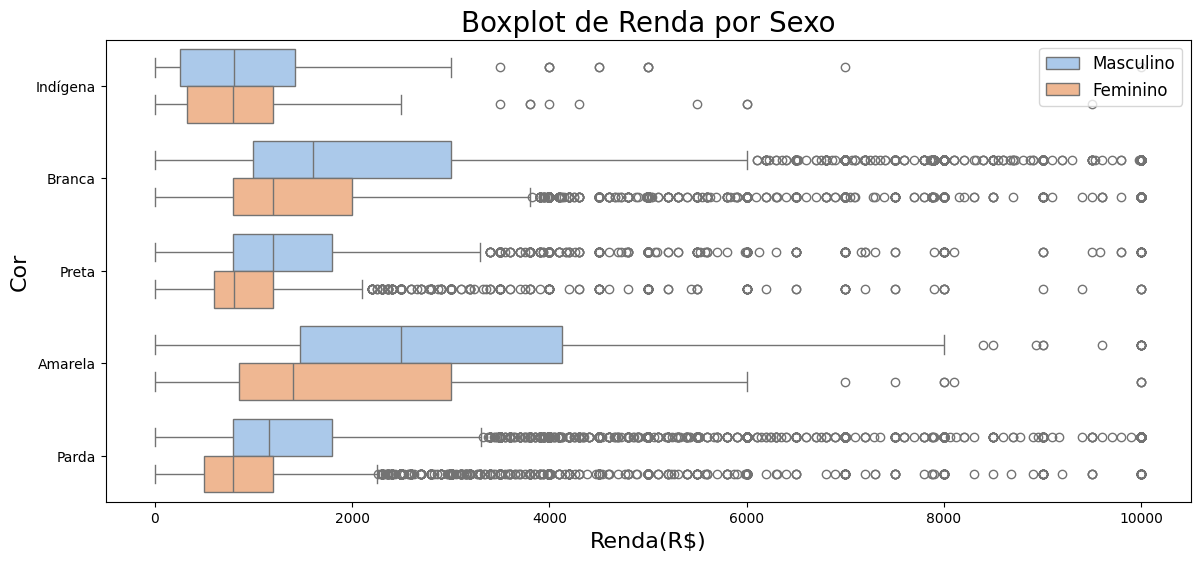

In [ ]:
dadosPNADFiltrados = dadosPNAD[dadosPNAD.Renda <= 10000]
boxplot = sns.boxplot(data = dadosPNADFiltrados, x = 'Renda', y = 'Cor', orient = 'h', hue = 'Sexo', palette = 'pastel')
boxplot.figure.set_size_inches(14,6)
boxplot.set_xlabel('Renda(R$)', fontsize = 16)
boxplot.set_title('Boxplot de Renda por Sexo', fontsize = 20);
boxplot.set_ylabel('Cor', fontsize = 16)
boxplot.set_yticklabels(labels = ['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'])
handles, _ = boxplot.get_legend_handles_labels()
boxplot.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)

# **Conclusões**

# **DESAFIO**

## **Qual percentual de pessoas de nosso dataset ganham um salário mínimo (R$ 788,00) ou menos?**

Utilize a função percentileofscore() do scipy para realizar estas análises.

Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

In [ ]:
from scipy.stats import percentileofscore

percentualPessoas788 = percentileofscore(dadosPNAD.Renda, 788, kind='weak')
percentualPessoas788 = round(percentualPessoas788, 2)

print(f'O percentual de pessoas do nosso dataset que ganham até um salário mínimo é de {percentualPessoas788}%')

O percentual de pessoas do nosso dataset que ganham até um salário mínimo é de 28.87%


## **Qual o valor máximo ganho por 99% das pessoas de nosso dataset?**

Utilize o método quantile() do pandas para realizar estas análises.

In [ ]:
print(f'O valor maximo de renda ganho por 99% das pessoas no dataset é R${dadosPNAD.Renda.quantile(q = 0.99)}')

O valor maximo de renda ganho por 99% das pessoas no dataset é R$15000.0


## **Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO**

Destaque os pontos mais importante que você observa nas tabulações

O parâmento aggfunc da função crosstab() pode receber uma lista de funções. Exemplo: aggfunc = ['mean', 'median', 'max', 'std']

In [ ]:
atributosRequeridos = {'mean','std', 'median', 'max'}
tabelaRAES = pd.crosstab(index = dadosPNAD['Anos de Estudo'], columns = dadosPNAD.Sexo, values = dadosPNAD.Renda, aggfunc = atributosRequeridos)
tabelaRAES.rename(index = anos_de_estudo, columns = sexo, inplace = True)
tabelaRAES

max                  mean               \
Sexo                           Masculino Feminino    Masculino     Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano     30000    10000   799.494638   516.201748   
1 ano                              30000     2000   895.629047   492.771987   
2 anos                             40000     4000   931.178986   529.911638   
3 anos                             80000     3500  1109.203862   546.853916   
4 anos                             50000    10000  1302.329283   704.279111   
5 anos                             35000     8000  1338.653218   781.389776   
6 anos                             25000     6000  1448.875419   833.732824   
7 anos                             40000     9000  1465.497940   830.751004   
8 anos                             30000    18000  1639.396667   933.615351   
9 anos                             60000    20000  1508.038850   868.021700   
10 anos                            45000     6000  1731.270847   925.919225   
11 anos                           200000   100000  2117.060504  1286.790889   
12 anos                            30000   120000  2470.330776  1682.313725   
13 anos                            25000    20000  3195.099154  1911.730047   
14 anos                            50000    20000  3706.620269  2226.460457   
15 anos ou mais                   200000   100000  6134.279790  3899.513231   
Não determinados                    7000     3000  1295.761905   798.174419   

                                  median                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     700.0    390.0  1023.904884   639.311534  
1 ano                              788.0    400.0  1331.950552   425.291842  
2 anos                             788.0    450.0  1435.173827   498.234168  
3 anos                             800.0    500.0  2143.800133   424.124446  
4 anos                            1000.0    788.0  1419.821787   629.553397  
5 anos                            1045.0    788.0  1484.650587   635.782641  
6 anos                            1200.0    788.0  1476.628602   574.547028  
7 anos                            1200.0    788.0  1419.708673   602.038029  
8 anos                            1300.0    800.0  1515.583715   896.781213  
9 anos                            1200.0    788.0  2137.664774   973.221652  
10 anos                           1218.0    800.0  2078.609734   620.611907  
11 anos                           1500.0   1000.0  2676.538942  1819.040417  
12 anos                           1800.0   1200.0  2268.081538  4851.833513  
13 anos                           2400.0   1300.0  2797.116800  2053.789771  
14 anos                           2500.0   1600.0  3987.214974  2064.083336  
15 anos ou mais                   4000.0   2800.0  7447.613594  4212.770709  
Não determinados                  1200.0    788.0   979.648745   459.985964

## **Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO**

É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.

1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000

2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: data=dados.query('Renda < 10000 and Idade == 40') ou data=dados.query('Renda < 10000 and Idade == 50')

3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro hue e indique a variável que quer incluir na subdivisão.

Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<ipython-input-137-942ea3026f0a>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplotMenor10000.set_yticklabels(labels = anosEstudoList, fontsize = 14);


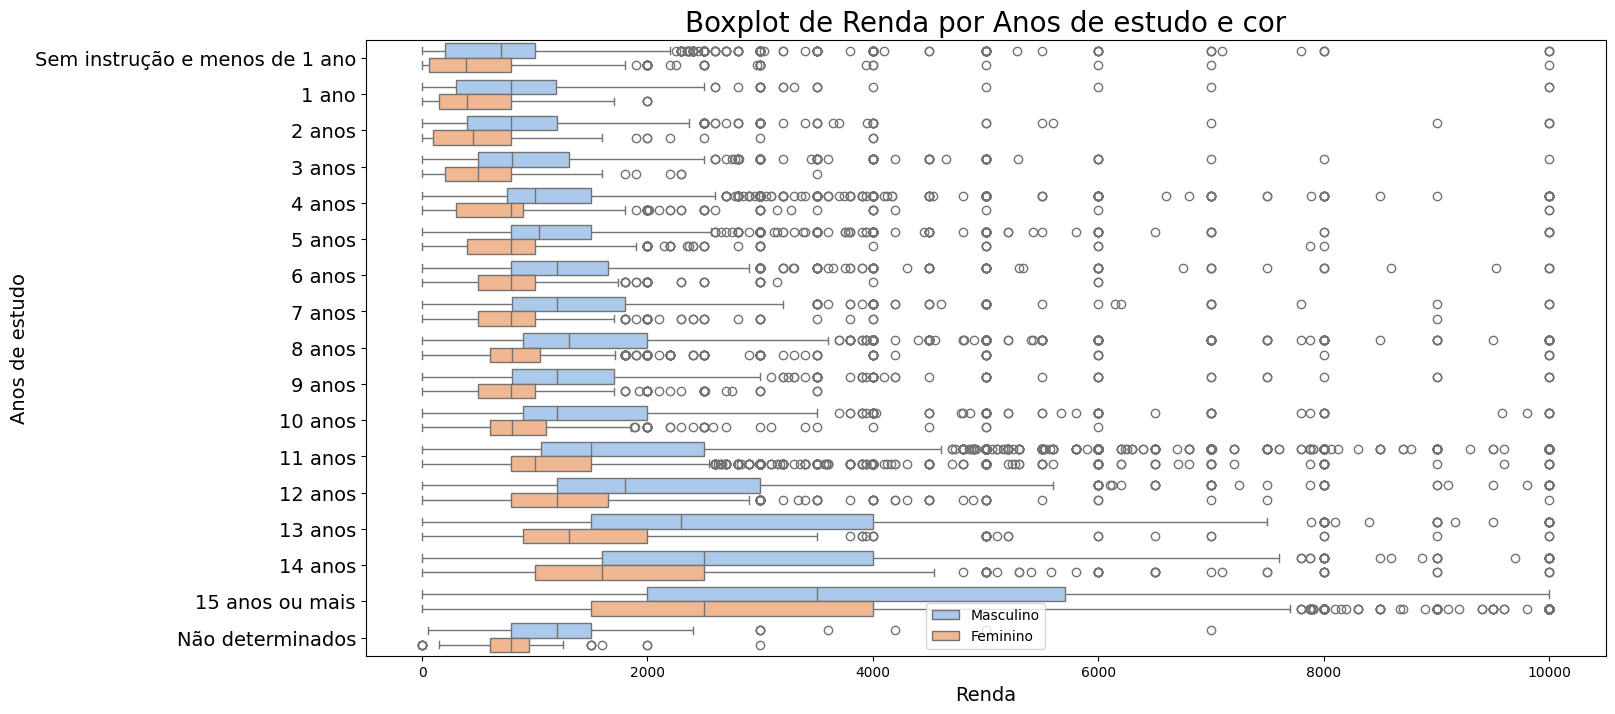

In [ ]:
# Boxplot das informações de pessoas com renda abaixo de R$ 10.000 com hue Sexo
anosEstudoList= list(anos_de_estudo.values())
boxplotMenor10000 = sns.boxplot(data = dadosPNADFiltrados, x = 'Renda', y = 'Anos de Estudo', orient = 'h', palette = 'pastel', hue = 'Sexo')
boxplotMenor10000.figure.set_size_inches(16,8)
boxplotMenor10000.set_title('Boxplot de Renda por Anos de estudo e cor', fontsize = 20)
boxplotMenor10000.set_xlabel('Renda', fontsize = 14)
boxplotMenor10000.set_ylabel('Anos de estudo', fontsize = 14)
boxplotMenor10000.set_yticklabels(labels = anosEstudoList, fontsize = 14);
handles, _ = boxplotMenor10000.get_legend_handles_labels()
boxplotMenor10000.legend(handles, ['Masculino', 'Feminino']);

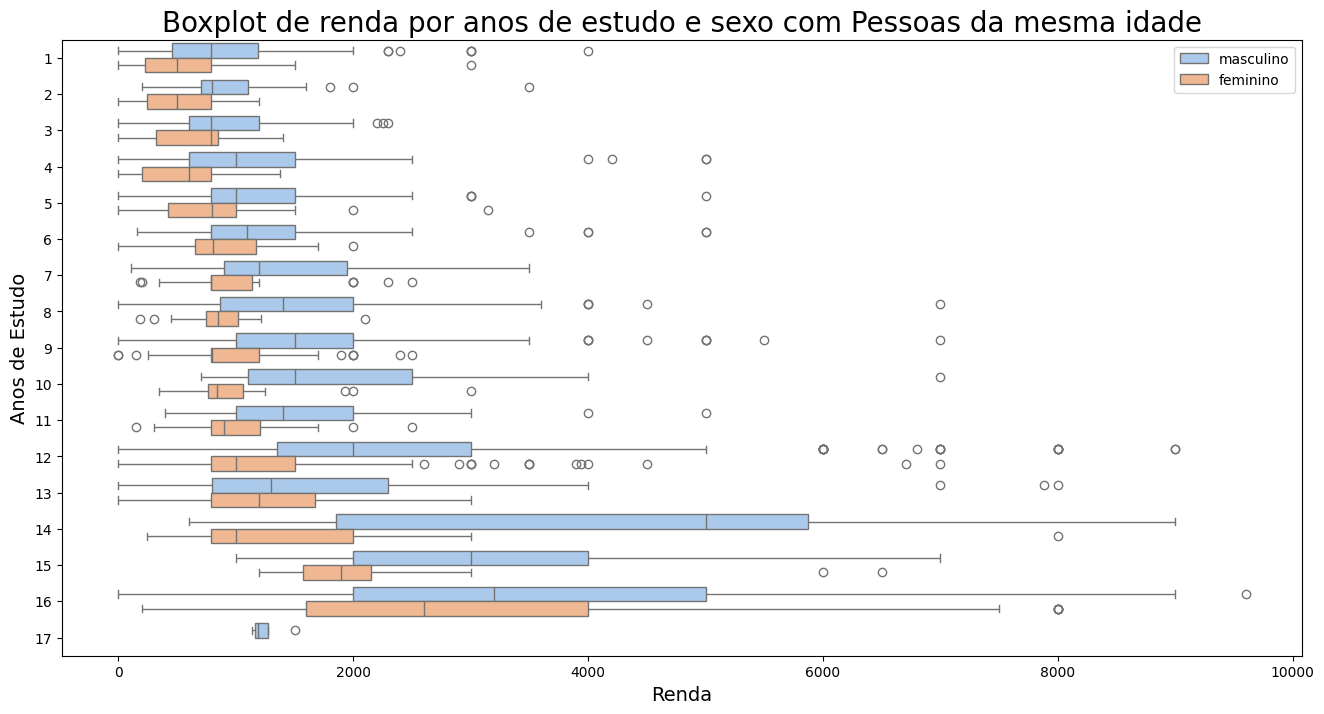

In [ ]:
# Boxplot das pessoas que apresentam uma renda menor ou igual a R$10.000,00 e idade igual a 50 anos com hue Sexo
selecao = (dadosPNAD.Renda < 10000) & (dadosPNAD.Idade == 50)
dadosFiltrados2 = dadosPNAD[selecao]
boxplotDezMil50 = sns.boxplot(data = dadosFiltrados2, x = "Renda", y = 'Anos de Estudo',hue = 'Sexo', palette = 'pastel', orient = 'h')
boxplotDezMil50.figure.set_size_inches(16,8)
boxplotDezMil50.set_title('Boxplot de renda por anos de estudo e sexo com Pessoas da mesma idade', fontsize = 20)
boxplotDezMil50.set_xlabel('Renda', fontsize = 14)
boxplotDezMil50.set_ylabel('Anos de Estudo', fontsize = 14);
handles, _ = boxplotDezMil50.get_legend_handles_labels()
boxplotDezMil50.legend(handles,['masculino', 'feminino'])

# **Conclusões**

A análise do primeiro boxplot revela de forma clara a desigualdade de renda entre homens e mulheres. Mesmo quando as mulheres apresentam, em média, mais anos de estudo do que os homens, sua renda ainda é inferior.

No segundo boxplot, a análise é feita com base em pessoas de mesma faixa etária, o que elimina a influência da idade na comparação. Ainda assim, a desigualdade persiste: mulheres com maior nível de escolaridade continuam recebendo menos do que homens com menos anos de estudo.


## **Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO**

Destaque os pontos mais importante que você observa nas tabulações

Utilize o método groupby() do pandas juntamente com o método agg() para contruir a tabulação. O método agg() pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})

In [ ]:
tabelaUF= dadosPNAD.groupby(['UF']).agg(func = {'Renda': ['mean', 'median', 'max', 'std']})
tabelaUF.rename(index = uf, columns = {'mean': 'média', 'median': 'mediana', 'max': 'máximo', 'std': 'desvio padrão'}, inplace = True)
tabelaUF

Renda                              
                           média mediana  máximo desvio padrão
UF                                                            
Rondônia             1789.761223  1200.0   50000   2406.161161
Acre                 1506.091782   900.0   30000   2276.233415
Amazonas             1445.130100   900.0   22000   1757.935591
Roraima              1783.588889  1000.0   20000   2079.659238
Pará                 1399.076871   850.0   50000   2053.779555
Amapá                1861.353516  1200.0   15580   2020.688632
Tocantins            1771.094946  1000.0   60000   2934.590741
Maranhão             1019.432009   700.0   30000   1887.816905
Piauí                1074.550784   750.0   40000   2373.355726
Ceará                1255.403692   789.0   25000   1821.963536
Rio Grande do Norte  1344.721480   800.0   15500   1651.805500
Paraíba              1293.370487   788.0   30000   1950.272431
Pernambuco           1527.079319   900.0   50000   2389.622497
Alagoas              1144.552602   788.0   11000   1237.856197
Sergipe              1109.111111   788.0   16000   1478.997878
Bahia                1429.645094   800.0  200000   3507.917248
Minas Gerais         2056.432084  1200.0  100000   3584.721547
Espírito Santo       2026.383852  1274.0  100000   3513.846868
Rio de Janeiro       2496.403168  1400.0  200000   5214.583518
São Paulo            2638.104986  1600.0   80000   3503.777366
Paraná               2493.870753  1500.0  200000   4302.937995
Santa Catarina       2470.854945  1800.0   80000   3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000   2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000   3031.419122
Mato Grosso          2130.652778  1500.0   35000   2542.630178
Goiás                1994.580794  1500.0   30000   2221.933065
Distrito Federal     4241.954722  2000.0  100000   5550.463338

## **Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO**

É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.

## **1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000**

<ipython-input-149-c8d96b63c44e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplotRendaUF = sns.boxplot(data = dadosPNADFiltrados, x = 'Renda', y = 'UF', orient = 'h', palette = 'YlGn')
<ipython-input-149-c8d96b63c44e>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplotRendaUF.set_yticklabels(labels = ufList);


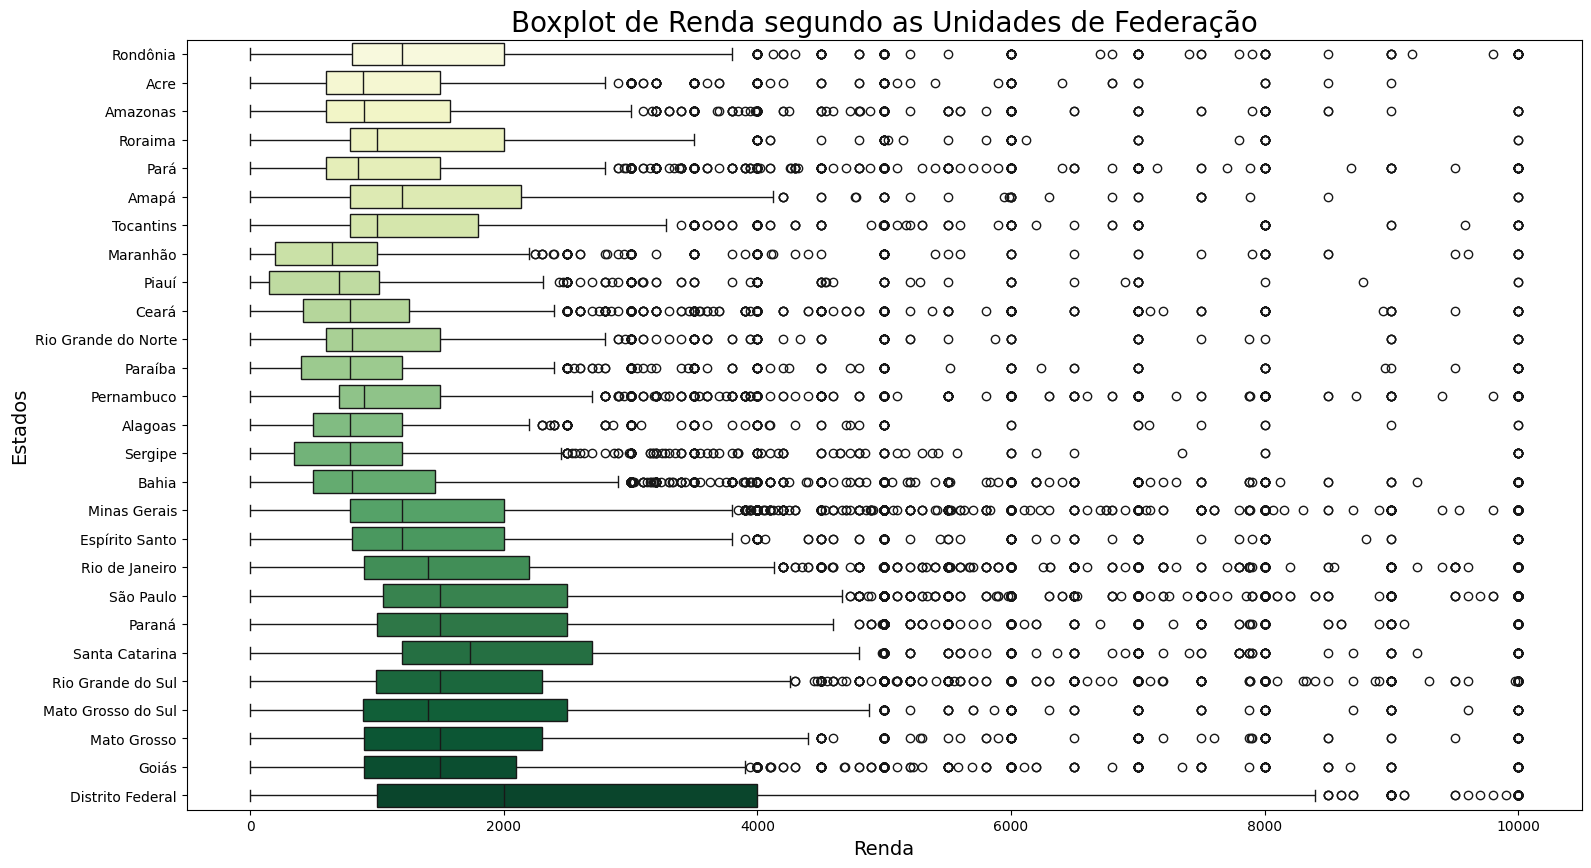

In [ ]:
ufList = uf.values();
boxplotRendaUF = sns.boxplot(data = dadosPNADFiltrados, x = 'Renda', y = 'UF', orient = 'h', palette = 'YlGn')
boxplotRendaUF.figure.set_size_inches(18,10)
boxplotRendaUF.set_xlabel('Renda', fontsize = 14)
boxplotRendaUF.set_ylabel('Estados', fontsize = 14)
boxplotRendaUF.set_title('Boxplot de Renda segundo as Unidades de Federação', fontsize = 20)
boxplotRendaUF.set_yticklabels(labels = ufList);

# **Conclusões**

A análise do boxplot de renda por unidade da federação mostra claramente que há diferenças significativas de renda entre os estados brasileiros. De modo geral, os estados da região Sudeste também exibem rendas médias superiores às observadas nas regiões Nordeste e Norte.

Essas disparidades podem ser explicadas por diversos fatores, como o nível de desenvolvimento econômico de cada estado, a disponibilidade de empregos qualificados e, principalmente, as diferenças no custo de vida. Regiões mais desenvolvidas tendem a concentrar centros administrativos, industriais e de serviços, o que resulta em maiores oportunidades de trabalho e, consequentemente, salários mais altos.

## **Finalizando.**

Resolva 3 exercícios de sua escolha do Capítulo 1 do livro OpenIntro Statistics

### **Exercício 1.1**

a) Qual porcentagem dos pacientes no grupo de tratamento estava sem dor 24 horas após receber acupuntura?

R: No grupo de tratamento, 10 dos 43 pacientes ficaram sem dor, o que representa 23%.

b) Qual porcentagem estava sem dor no grupo de controle?

R: No grupo de controle, apenas 2 dos 46 pacientes ficaram sem dor, ou seja, 4%.

c) Em qual grupo uma porcentagem maior de pacientes ficou sem dor 24 horas após receber acupuntura?

R:  A porcentagem foi maior no grupo que recebeu acupuntura, mais pessoas relataram estar sem dor nesse grupo do que no grupo de controle.

d) Suas descobertas até agora podem sugerir que a acupuntura é um tratamento eficaz para enxaquecas em todas as pessoas que sofrem com elas. No entanto, essa não é a única conclusão possível com base nos seus resultados até o momento. Qual é uma outra possível explicação para a diferença observada entre as porcentagens de pacientes que estavam sem dor 24 horas após receber acupuntura nos dois grupos?

R: Sim, pois é possível que a diferença entre os grupos tenha ocorrido por acaso, e não necessariamente por causa do tratamento com acupuntura.

## **Exercício 1.3**
a) Identifique a principal questão de pesquisa do estudo.

R: O estudo busca responder à pergunta: “Existe alguma relação entre a exposição à poluição do ar e o nascimento prematuro de bebês?”

b) Quem são os participantes deste estudo e quantos foram incluídos?

R:  O estudo analisou 143.196 nascimentos ocorridos no sul da Califórnia, entre os anos de 1989 e 1993.

c) Quais são as variáveis do estudo? Identifique cada variável como numérica ou categórica. Se for numérica, indique se é discreta ou contínua. Se for categórica, indique se é ordinal.

R: Foram analisadas as seguintes variáveis, todas numéricas e contínuas:

* Níveis de monóxido de carbono,
* Dióxido de nitrogênio,
* Ozônio,
* Partículas finas (PM10 – com menos de 10 µg/m³),


Duração da gestação.

## **Exercício 1.5**
a) Identifique a principal questão de pesquisa do estudo.

R: A pesquisa busca entender se dizer explicitamente às crianças para não trapacearem influencia a chance de elas trapacearem.

b) Quem são os participantes deste estudo e quantos foram incluídos?

R: Participaram 160 crianças com idades entre 5 e 15 anos.

c) Quantas variáveis foram registradas para cada participante no estudo para chegar a essas conclusões? Indique as variáveis e seus tipos.

R: Foram coletadas quatro variáveis para cada criança:
* Idade – variável numérica contínua,
* Sexo – variável categórica,
* Se a criança era filha única ou não (categórica),
* Se ela trapaceou ou não durante o experimento (categórica).
